SUPPORTLYTICS (MILESTONE 1) BY SAKTHESHWARAN **T**

Step 1: Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Step 2: Load the dataset (*supportlytics.csv*)

In [2]:
df = pd.read_csv("supportlytics.csv")

Step 3: Explore the dataset using .head(), .Describe() and .info() functions

In [3]:
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,3.0
1,2,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,3.0
2,3,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0
3,4,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,19-01-2021,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,01-06-2023 17:46,31-05-2023 23:51,1.0
4,5,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,24-10-2021,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,01-06-2023 12:05,01-06-2023 09:27,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     1000 non-null   int64  
 1   Customer Name                 1000 non-null   object 
 2   Customer Email                1000 non-null   object 
 3   Customer Age                  1000 non-null   int64  
 4   Customer Gender               1000 non-null   object 
 5   Product Purchased             1000 non-null   object 
 6   Date of Purchase              1000 non-null   object 
 7   Ticket Type                   1000 non-null   object 
 8   Ticket Subject                1000 non-null   object 
 9   Ticket Description            1000 non-null   object 
 10  Ticket Status                 996 non-null    object 
 11  Ticket Priority               990 non-null    object 
 12  Ticket Channel                1000 non-null   object 
 13  Firs

In [7]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,1000.000000,1000.000000,983.000000
mean,500.500000,44.382000,3.026450
std,288.819436,14.970644,1.425442
min,1.000000,18.000000,1.000000
25%,250.750000,32.000000,2.000000
50%,500.500000,44.000000,3.000000
75%,750.250000,57.000000,4.000000
max,1000.000000,70.000000,5.000000


**DATA PREPROCESSING**

Step 4: Drop the duplicate Rows

In [8]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (1000, 16)


Step 5: Count the Number of null values in the dataset and handle it using Central Tendency methods

In [9]:
# Total null values in entire dataset
total_nulls = df.isnull().sum().sum()
print("Total number of null values:", total_nulls)


Total number of null values: 31


>Handling missing numerical values with Median to avoid the outliers

In [11]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


> Handling missing categorical values with Mode

In [12]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Step 6: Encoding the Ticket priority using Ordinal Encoding

In [13]:
# Ordinal encoding for Ticket Priority
priority_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Critical": 4
}

df["Priority_Score"] = df["Ticket Priority"].map(priority_map)


Step 7: Normalizing the numerical values using MinMax Normalization to fit the values between the same range.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler for 1–10 range
scaler_1_10 = MinMaxScaler(feature_range=(1, 10))

# Columns to normalize
cols_to_normalize = [
    "Priority_Score",
    "Customer Satisfaction Rating"
]

# Apply scaling
df[cols_to_normalize] = scaler_1_10.fit_transform(df[cols_to_normalize])



In [20]:
drop_cols = [
    "Customer Name",
    "Customer Email",
]

df = df.drop(columns=drop_cols, errors="ignore")


Here is the cleaned dataset for analysis,

In [22]:
df.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score
0,1,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,5.5,1.0
1,2,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,5.5,1.0
2,3,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0,1.0
3,4,48,Male,Nintendo Switch,19-01-2021,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,01-06-2023 17:46,31-05-2023 23:51,1.0,7.0
4,5,51,Male,Microsoft Xbox Controller,24-10-2021,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,01-06-2023 12:05,01-06-2023 09:27,1.0,7.0


In [24]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating,Priority_Score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.382000,5.558500,5.704000
std,288.819436,14.970644,3.179849,3.341489
min,1.000000,18.000000,1.000000,1.000000
25%,250.750000,32.000000,3.250000,4.000000
50%,500.500000,44.000000,5.500000,7.000000
75%,750.250000,57.000000,7.750000,10.000000
max,1000.000000,70.000000,10.000000,10.000000


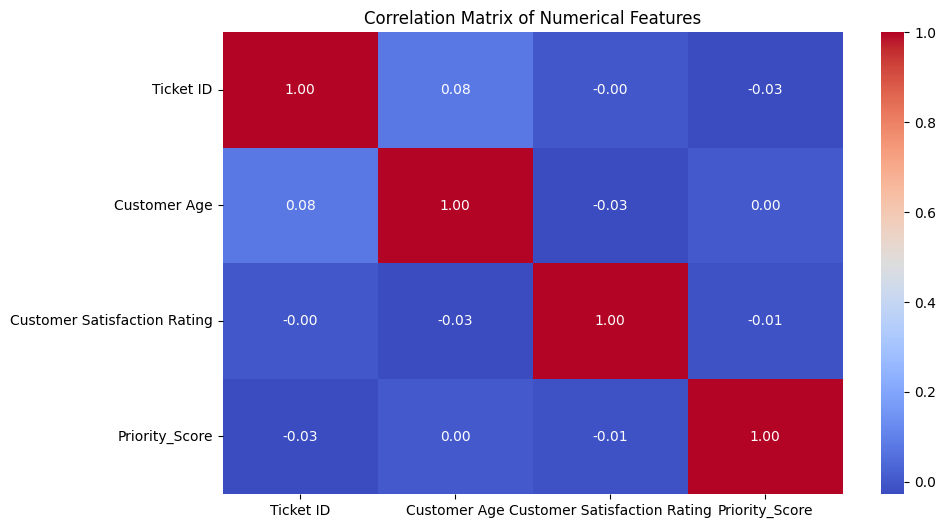

In [26]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Step 8: Perform Feature Engineering to create new feature( Resolution duration = first response time - time to solve the ticket)

In [29]:
# Convert datetime columns
df["First Response Time"] = pd.to_datetime(df["First Response Time"], format="%d-%m-%Y %H:%M")
df["Time to Resolution"] = pd.to_datetime(df["Time to Resolution"], format="%d-%m-%Y %H:%M")

# Create Resolution_Duration feature in HOURS
df["Resolution_Duration"] = (
    df["Time to Resolution"] - df["First Response Time"]
).dt.total_seconds() / 3600
df["Resolution_Duration"] = df["Resolution_Duration"].abs()



In [33]:
df.to_csv("supportlytics_cleaned.csv", index=False)

In [30]:
df.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score,Resolution_Duration
0,1,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,2023-06-01 11:14:00,2023-06-01 18:05:00,5.5,1.0,6.850000
1,2,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,2023-06-01 07:29:00,2023-06-01 01:57:00,5.5,1.0,5.533333
2,3,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,2023-06-01 00:12:00,2023-06-01 19:53:00,1.0,1.0,19.683333
3,4,48,Male,Nintendo Switch,19-01-2021,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,High,Phone,2023-06-01 17:46:00,2023-05-31 23:51:00,1.0,7.0,17.916667
4,5,51,Male,Microsoft Xbox Controller,24-10-2021,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,High,Chat,2023-06-01 12:05:00,2023-06-01 09:27:00,1.0,7.0,2.633333


Distribution plots ( by Ticket Type, category and priority scores)

/tmp/ipython-input-3457559168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Ticket Type", palette="Set2")


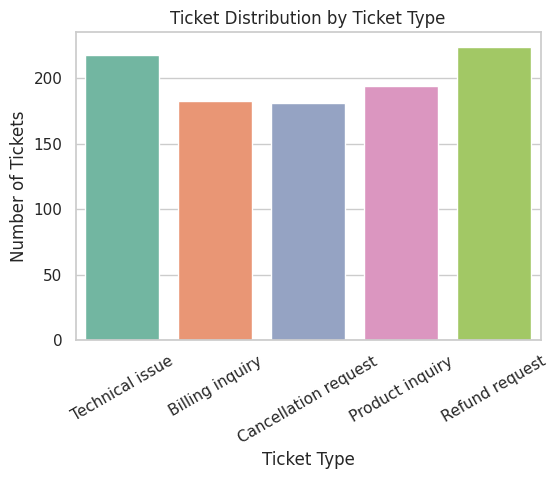

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Ticket Type", palette="Set2")
plt.title("Ticket Distribution by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-806328211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Priority_Score", palette="coolwarm")


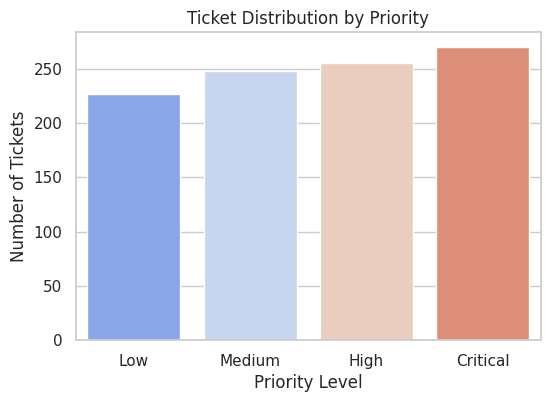

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Priority_Score", palette="coolwarm")

plt.title("Ticket Distribution by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Number of Tickets")

# Replace x-axis labels ONLY
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Low", "Medium", "High", "Critical"]
)

plt.show()


/tmp/ipython-input-1454097142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


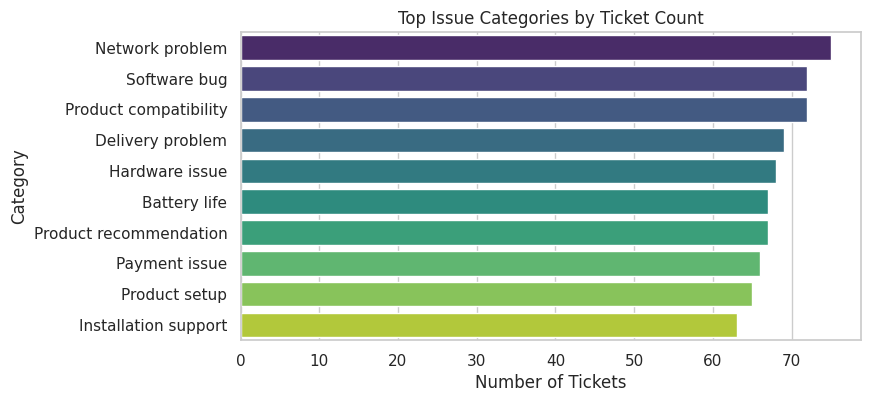

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    y="Ticket Subject",
    order=df["Ticket Subject"].value_counts().head(10).index,
    palette="viridis"
)
plt.title("Top Issue Categories by Ticket Count")
plt.xlabel("Number of Tickets")
plt.ylabel("Category")
plt.show()


**DATA DICTIONARY:**
| Attribute Name               | Data Type       | Description                                                |
| ---------------------------- | --------------- | ---------------------------------------------------------- |
| Ticket ID                    | Integer         | Unique identifier for each support ticket                  |
| Ticket Type                  | Categorical     | Nature of the support request (e.g., technical, billing)   |
| Ticket Priority              | Categorical     | Urgency level assigned to the ticket                       |
| Priority_Score               | Numeric         | Numerical encoding of ticket priority (engineered feature) |
| Ticket Status                | Categorical     | Current lifecycle status of the ticket                     |
| Ticket Channel               | Categorical     | Channel through which the ticket was raised                |
| First Response Time          | Datetime        | Timestamp of the first response provided                   |
| Time to Resolution           | Datetime        | Timestamp when the ticket was resolved                     |
| Resolution_Duration          | Numeric (Hours) | Time taken to resolve the ticket in hours                  |
| Customer Satisfaction Rating | Numeric         | Customer feedback score after resolution                   |
| Ticket Subject               | Categorical     | Short summary of the reported issue                        |
| Ticket Description           | Text            | Detailed description of the issue                          |
| Product                      | Categorical     | Product or service related to the ticket                   |


**SUMMARY:**
1. Resolution duration was engineered by calculating the time difference between first response and resolution timestamps and converting it into hours.

2. Ticket priority was transformed into a numerical priority score using ordinal encoding.

3. Missing numerical values were handled using median-based central tendency imputation.

4. Categorical attributes were cleaned and standardized to ensure consistency.

5. Priority score and customer satisfaction rating were scaled to improve interpretability and comparison.